In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

import cv2
import skimage
from skimage import exposure

In [2]:

data_c1,sr_c1=librosa.load("test/cardboard8.mp3")
data_c2,sr_c2=librosa.load("test/cardboard2.mp3")
data_m1,sr_m1=librosa.load("test/metal_banging1.mp3")
data_m2,sr_m2=librosa.load("test/metal_banging2.mp3")

In [106]:
n_fft = 2048 
hop_length = 512

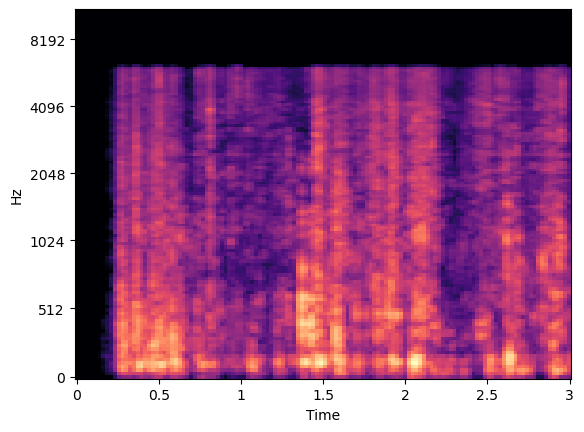

In [107]:
spec_c = librosa.feature.melspectrogram(y=data_c1, sr=sr_c1, n_fft=n_fft, hop_length=hop_length, fmax=22000)
spec_c_db=librosa.power_to_db(spec_c, ref=np.max)
librosa.display.specshow(spec_c_db, y_axis='mel', x_axis='time')

In [110]:
amplitude_c=np.max(spec_c_db)
amplitude_c

0.0

In [63]:
# spec_db_norm_c = cv2.normalize(spec_c_db, None, 0, 255, cv2.NORM_MINMAX)
# spec_db_uint8_c = spec_db_norm_c.astype(np.uint8)
# spec_db_contrast_c = exposure.equalize_adapthist(spec_db_uint8_c)
# librosa.display.specshow(spec_db_contrast_c, sr=sr_m2, hop_length=hop_length, x_axis='time', y_axis='mel')

c:\Users\Somya\anaconda3\envs\ee604\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


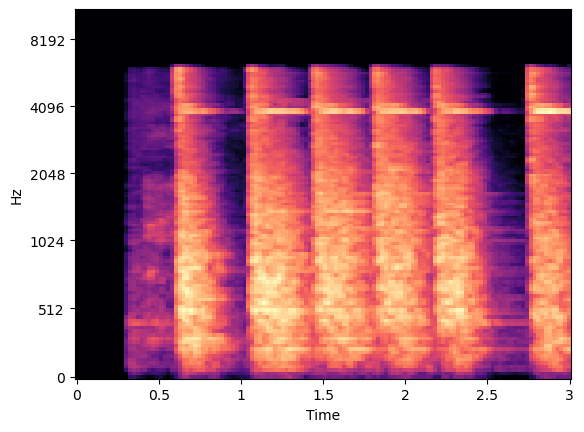

In [78]:
spec_m = librosa.feature.melspectrogram(y=data_m1, sr=sr_m1, n_fft=n_fft, hop_length=hop_length, fmax=22000)
spec_m_db=librosa.power_to_db(spec_m, ref=np.max)
librosa.display.specshow(spec_m_db, y_axis='mel', x_axis='time')

In [49]:
# spec_db_norm_m = cv2.normalize(spec_m_db, None, 0, 255, cv2.NORM_MINMAX)
# spec_db_uint8_m = spec_db_norm_m.astype(np.uint8)
# spec_db_contrast_m = exposure.equalize_adapthist(spec_db_uint8_m)
# librosa.display.specshow(spec_db_contrast_m, sr=sr_m2, hop_length=hop_length, x_axis='time', y_axis='mel')

In [50]:
# spec_db_contrast_m_8bit = cv2.convertScaleAbs(spec_db_contrast_m)
# _, binary_image = cv2.threshold(spec_db_contrast_m_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# smoothed_image = cv2.GaussianBlur(spec_db_contrast_m_8bit, (81, 81), 0)
# edges = cv2.Canny(spec_db_contrast_m_8bit, 10, 200)
# kernel = np.ones((3, 3), np.uint8)
# dilation = cv2.dilate(binary_image, kernel, iterations=1)


# cv2.imshow("erod",dilation)
# cv2.waitKey(0)

In [100]:
# spec_c_db=spec_c_db.astype(np.uint8)
# equalized_image = cv2.equalizeHist(spec_c_db)
# mode_intensity = int(np.median(equalized_image))
# threshc = cv2.threshold(equalized_image,120,255,cv2.THRESH_BINARY)[1]
# cv2.imshow("b",threshc)
# cv2.waitKey(0)

-1

In [104]:
# spec_m_db=spec_m_db.astype(np.uint8)
# equalized_image_m = cv2.equalizeHist(spec_m_db)
# mode_intensity_m = int(np.median(equalized_image_m))
# lines = cv2.HoughLines(equalized_image_m, 1, np.pi / 180, threshold=50)
# threshm = cv2.threshold(equalized_image_m,120,255,cv2.THRESH_BINARY)[1]
# cv2.imshow("b",threshm)
# cv2.waitKey(0)


-1

131

In [4]:

def solution(audio_path):
    ############################
    ############################

    ############################
    ############################
    ## comment the line below before submitting else your code wont be executed##
    # pass
    data,sr=librosa.load(audio_path)
    n_fft = 2048 
    hop_length = 512
    spec= librosa.feature.melspectrogram(y=data, sr=sr, n_fft=n_fft, hop_length=hop_length, fmax=22000)
    y=librosa.power_to_db(spec, ref=np.max)
    y=np.abs(y)
    mean = np.mean(y)
    std = np.std(y)
    threshold = mean + 5* std
    if threshold>150:
        class_name="metal"
    else:
        class_name="cardboard"
    
    return class_name


In [6]:
path="test/metal_banging11.mp3"
sol=solution(path)
sol

'metal'